<a href="https://colab.research.google.com/github/tusharpoddar/e-Science-Research/blob/master/GoogleDrive/Cluster_plot_netcdf_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following notebook is used to plot the larger data cluter plot using matplotlib OffsetBox.
It plots the cluster plot with 1700 spectrograms generated by mice sound and random noise together. The matplotlib offsetbox is able to distinguish between them and plots the mice sounds together. The following code uses the tf-records and the numpy array for the offsetbox plot. The numpy array actually plots the spectrograms and the tf-records are used to specify the location of each spectrogram.

## Why is this notebook useful?
This notebook helps us to be sure that the computer recognizes some similar patters between sounds of similar representation. This also gives us a green signal that now we have the data ready to working with the VGGish method and. train the model for final use. 

## Next steps -
Now since we have established that we have the data for the training we are moving forward with the training of the model. The complete training of the VGGish model can be seen in the notebook called. Single-prediction-training. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [ ]:
spectrogram_data = np.load('/content/gdrive/Shared drives/Research/Data/Numpy files/annot_df_CPApost_round2/fearNoiseSpectrogram.npy')

In [ ]:
spectrogram_data.shape

(1759, 96, 64)

In [ ]:
# reading the contents of the tf records that we get as output for the 
# vggish_inference_demo.py.

# NOTE - In order to get these we need to have 64 mel bins instead of the 512 that we were using because the use
# 64 in the vggiish_sliim module. The program still runs with the updated
tfrecords_filename = '/content/gdrive/Shared drives/Research/Data/Tf-records/selectionTable-1700-netcdf.tfrecords'
record_iterator = tf.compat.v1.python_io.tf_record_iterator(path=tfrecords_filename)
string_record = next(record_iterator)
example = tf.train.SequenceExample()
example.ParseFromString(string_record)

f = example.feature_lists.feature_list['audio_embedding']

hexembed = f.feature[59].bytes_list.value[0].hex()

vggish_embed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [ ]:
len(vggish_embed) 

128

In [ ]:
tf_records_array = []
for x in range(0, 1759):
    temp = f.feature[x].bytes_list.value[0].hex()
    tf_records_array.append([int(temp[i:i+2],16) for i in range(0,len(temp),2)])

In [ ]:
tf_records_array = np.array(tf_records_array)
tf_records_array.shape

(1759, 128)

In [ ]:
# doing PCA decomposition
pca = decomposition.PCA()
pca.fit(tf_records_array)
print(pca)

# applying dimentionaly reduction to that array 
transformed_data = pca.transform(tf_records_array)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


# Comapring the data before and after the PCA reduction

In [ ]:
print(tf_records_array[1, :])

[211   0 253  92 158   0   0   0 255 141 125   0   0 255 178  13   0 255
   0 209 255   0   0   0 255   0  39 172   0 255 158 255 255   0 103   0
 255 255 135 255   0   0  48 199 255   0 255   0  46   0  45 138   0   0
 255 255   0   0 113   0 107 237   0   0 235   0 255 255   0 255   0 178
   0 255   0   0  35  68   0   0   0   0   0   0 255 165 255 255   0   0
 255 255   0 194 255   0  69   0 148 255 255 255 255   0   0 255   0 255
 255 255 234   0 254   0   0   0   0 227   0 255 255   0   0   0   0   0
   0   0]


In [ ]:
print(tf_records_array[1000, :])

[227   0 255  56  36   0   0   0 211 255  31 174   0 255   0   0 222  75
   0   0 255 153 255 183 255 117   0 125 115 136   0 255   0   0   0   0
 255  75 117 255 169   0   0   0 255 191   0   0  28   0   0  83   0   0
 255 255   0 239   0 255 255  99   0  11 115 132 255 255   0 255   0 176
   0 255 255   0 129   0 255   0 255 255   0   0 255 255   0  58 131 255
 255   0   0   0 255   0 255   0   0 255 255 140   0 255   0 255 255 255
 255 255  16 255 255   0   0  91 255   0   0 239   0   0   0 255   0 255
   0   0]


# So unlike before, atleast the data is not the same. 

In [ ]:
print(transformed_data[1, :])

[-3.66800549e+02 -4.83896051e+01  1.19022136e+02 -1.34820706e+02
  1.10398023e+02  1.85114156e+02 -9.13687586e+01 -1.42053054e+02
  2.62003360e+02  3.00629592e+02 -1.63064660e+02 -2.32171284e+02
 -4.01594192e+01 -8.38249993e+01 -4.29493235e+01 -3.46333797e+01
 -2.19916203e+01  1.13409834e+01 -3.64321742e+01 -1.09694731e+02
  1.49879481e+02 -1.66715452e+01 -5.80407229e+01  7.50876729e+01
  3.51825230e+01 -6.59275798e+01 -3.14873937e+01  1.70061364e+01
  1.79695147e+01  2.34083974e+01 -1.02820220e+02 -1.94484628e+01
  7.95989720e+01 -2.57454042e+01  1.48053575e+02  5.55103211e+01
 -4.40136770e+01 -7.86434436e+01 -1.21473734e+02 -3.89855595e+01
  1.79594122e+01 -1.19288101e+01 -2.33494571e+01  1.47053290e+01
 -1.38216454e+01  2.22146676e+01  3.55648013e+01 -4.63853055e+01
 -8.05310185e+00  5.81885861e-01  4.23103074e+01 -9.98000010e+00
 -4.03806770e+01  2.78157548e+01 -7.30613942e+01 -1.79795895e+01
 -2.84444838e+01 -2.07471409e+01  5.59097967e+01  3.06550552e+01
 -7.04152345e+01  2.95610

In [ ]:
print(transformed_data[1000, :])

[ 5.90165918e+02  3.40936481e+02 -1.48414885e+02  2.43494301e+02
 -1.12894093e+02 -1.91420209e+02 -8.99092123e+00  1.86704901e+02
 -7.81277526e+01  1.15981649e+02 -1.95552122e+02 -2.72385987e+02
 -5.54190181e+01  4.30483419e+01  1.10981604e+02 -1.05096177e+02
 -1.62714030e+02 -8.35552769e+01 -5.19986453e+01  7.34740272e+01
  3.15681606e+01  3.03882729e+01 -4.42117885e+01  1.47113203e+00
  6.88035047e+01 -2.86157458e+01 -3.84264533e+01  5.25972701e+01
  3.65150598e+01  6.25959029e+01 -3.06098515e+01  6.63641234e+01
 -1.84234285e+01 -3.54194263e+01  1.13378312e+01 -1.97184770e+01
 -1.92402287e+00 -1.68096033e+02 -4.14611756e+01 -3.55145575e+01
  1.61618151e+01 -7.19261804e+01 -5.26445746e+01 -5.02552781e+01
 -2.37060714e+01 -1.93265951e+01  4.94335515e+01  8.27374750e+01
 -2.57755002e+01 -5.64795915e+01  8.59406283e+01  5.98797129e+01
  8.08576180e+01  1.95941370e+01 -5.80668856e+01  1.05227387e+02
 -1.27356287e+01 -7.20793675e+01 -1.01361389e+01 -1.19948723e+01
  1.40972540e+01  8.03745

### So we make a conclusion that this time the data before and after the PCA is different. 

# Plotting the cluster plot now - 

In [ ]:
# selecting all the rows for the first 2 columns 
# here colum 2 is not selected and only 0, 1 colum is selected 
# we are selecting only 2 columns becasue we need to plot the data on a 2d graph. 

X_transformed = transformed_data[:,0:2]

In [ ]:
from matplotlib import offsetbox
import matplotlib
# in this code i am trying to add the text instead of the images so that I have more space for the images and they dont overlap
def plot_embedding(X_transformed, X, title=None, y = None):
    x_min, x_max = np.min(X_transformed, 0), np.max(X_transformed, 0)
    X_transformed = (X_transformed - x_min) / (x_max - x_min)
    
    
    # this is the main plot that is being plotted
    plt.figure(figsize=(20,20))
    
    # creating subplots of all the iimages that need to be positioned
    ax = plt.subplot(111)
    for i in range(X_transformed.shape[0]):
        
        # the following if condition is to give the plot a title in this case we are giving it 'o'
        if y is None:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str("o"),
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str(y[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})
            

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X_transformed.shape[0]):
            dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
            # if np.min(dist) < 4e-30:
                # don't show points that are too close
                # continue
            shown_images = np.r_[shown_images, [X_transformed[i]]]
            # imagebox = offsetbox.AnnotationBbox(
            #     # because the X is of the shape (?, 96, 64)
            #     offsetbox.OffsetImage(X[i, :, :].T, cmap=plt.cm.gray_r), # this is the offsetbox that is the first parameter that is required to 
            #     X_transformed[i]) # this parameter is used to find the position where the spectrogram is plotted
            print(X_transformed[i], i)
            number = matplotlib.text.Annotation(i, X_transformed[i])
            
            # addinig the images to the ax or the subplots created for the main matplotlib
            ax.add_artist(number)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

[0.20969453 0.27298666] 0
[0.20093316 0.40876447] 1
[0.28009734 0.62797507] 2
[0.51859473 0.6913086 ] 3
[0.17705885 0.3272419 ] 4
[0.0722318 0.6261661] 5
[0.11213538 0.74076254] 6
[0.11737905 0.41689308] 7
[0.16648176 0.42801833] 8
[0.27344805 0.72010059] 9
[0.30429561 0.71631151] 10
[0.24142541 0.42400541] 11
[0.35035656 0.63903559] 12
[0.26299284 0.92578967] 13
[0.59378101 0.69212828] 14
[0.25140513 0.37117173] 15
[0.39072317 0.61984777] 16
[0.40044628 0.63548396] 17
[0.06018648 0.61819257] 18
[0.44990788 0.64841234] 19
[0.5728474 0.4819647] 20
[0.16338085 0.80727858] 21
[0.18264178 0.80944599] 22
[0.51025412 0.52749017] 23
[0.39473447 0.67925875] 24
[0.32467095 0.58425795] 25
[0.12332978 0.65086954] 26
[0.20660647 0.58508267] 27
[0.17125625 0.47792265] 28
[0.30164986 0.43057958] 29
[0.30525819 0.43156848] 30
[0.16398693 0.57480258] 31
[0.51736431 0.91313482] 32
[0.20573756 0.74036853] 33
[0.5661388  0.44284716] 34
[0.27330533 0.86311427] 35
[0.01388055 0.67731612] 36
[0.15191371 0.6

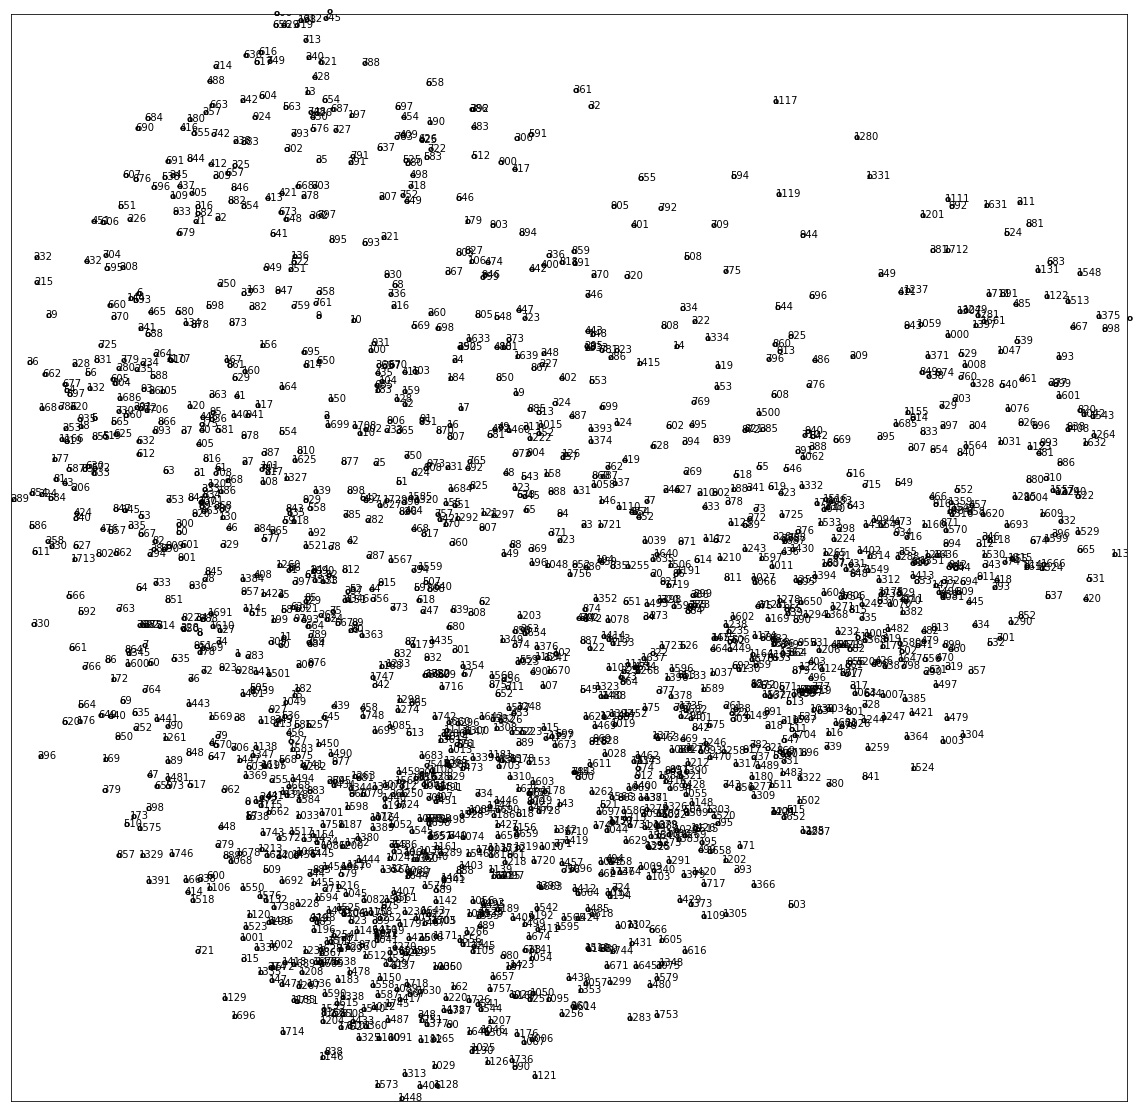

In [ ]:
plot_embedding(X_transformed, spectrogram_data)

In [ ]:
# now instead of plotting the numbers I want to plot two colows that represent different - mice and random noise
# so for this I need to selection table - 
path = '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/feature_data_frames/Old/annot_8features_100noise_fear.csv'

In [ ]:
import pandas as pd

In [ ]:
annot = pd.read_csv(path)

In [ ]:
annot = pd.DataFrame(data = annot)

In [ ]:
annot_np = np.array(annot)

In [ ]:
#record[4] == 'rand_noise'

In [ ]:
from matplotlib import offsetbox
import matplotlib
# in this code i am trying to add the text instead of the images so that I have more space for the images and they dont overlap
def plot_embedding(X_transformed, X, title=None, y = None):
    x_min, x_max = np.min(X_transformed, 0), np.max(X_transformed, 0)
    X_transformed = (X_transformed - x_min) / (x_max - x_min)
    
    
    # this is the main plot that is being plotted
    plt.figure(figsize=(20,20))
    
    # creating subplots of all the iimages that need to be positioned
    ax = plt.subplot(111)
    # for i in range(X_transformed.shape[0]):
        
    #     # the following if condition is to give the plot a title in this case we are giving it 'o'
    #     if y is None:
    #         plt.text(X_transformed[i, 0], X_transformed[i, 1], str("o"),
    #                  fontdict={'weight': 'bold', 'size': 9})
    #     else:
    #         plt.text(X_transformed[i, 0], X_transformed[i, 1], str(y[i]),
    #                  color=plt.cm.Set1(y[i] / 10.),
    #                  fontdict={'weight': 'bold', 'size': 9})
            

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X_transformed.shape[0]):
            dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
            # if np.min(dist) < 4e-30:
                # don't show points that are too close
                # continue
            shown_images = np.r_[shown_images, [X_transformed[i]]]
            # imagebox = offsetbox.AnnotationBbox(
            #     # because the X is of the shape (?, 96, 64)
            #     offsetbox.OffsetImage(X[i, :, :].T, cmap=plt.cm.gray_r), # this is the offsetbox that is the first parameter that is required to 
            #     X_transformed[i]) # this parameter is used to find the position where the spectrogram is plotted
            # print(X_transformed[i], i)
            # number = matplotlib.text.Annotation(i, X_transformed[i])
            if annot_np[i][4] == 'rand_noise':
              p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='orange')
            else:
              p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='blue')
            # if annot_np[i][4] == 'low slug':
            #   p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='blue')
            # elif annot_np[i][4] == 'high slug':
            #   p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='red')
            # elif annot_np[i][4] == 'bbc':
            #   p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='magenta')
            # elif annot_np[i][4] == 'high multi':
            #   p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='cyan')
            # elif annot_np[i][4] == 'low multi':
            #   p1 = matplotlib.patches.Rectangle((X_transformed[i][0], X_transformed[i][1]), 0.005, 0.005, color ='pink')
            # addinig the images to the ax or the subplots created for the main matplotlib
            ax.add_artist(p1)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

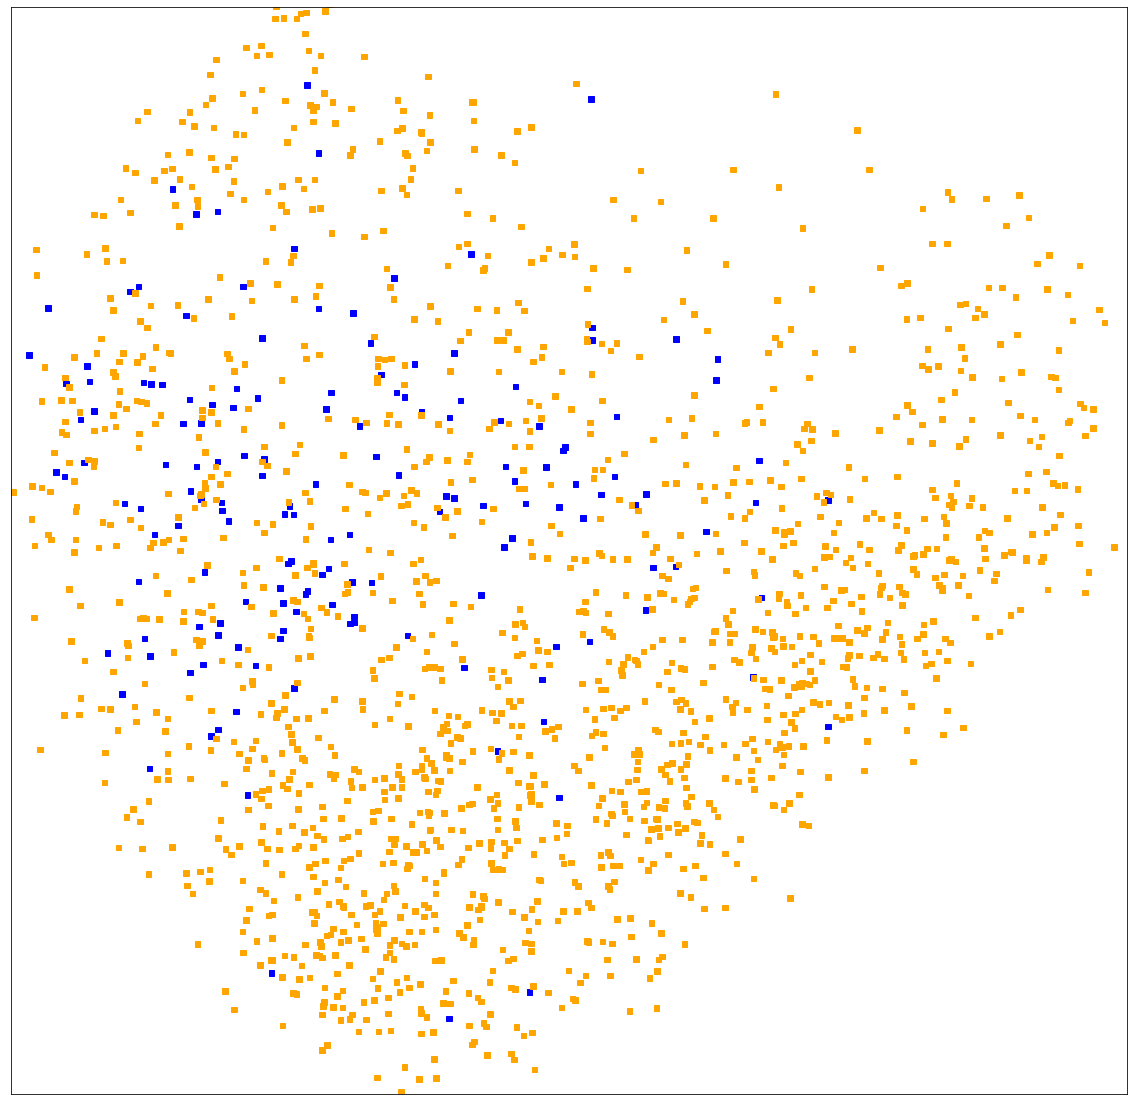

In [ ]:
plot_embedding(X_transformed, spectrogram_data)